In [ ]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

In [ ]:
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [ ]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

In [ ]:
graph.data = np.exp(-graph.data / graph.data.std())

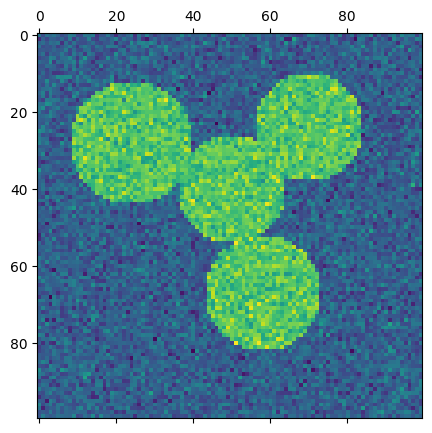

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.matshow(img)
plt.show()

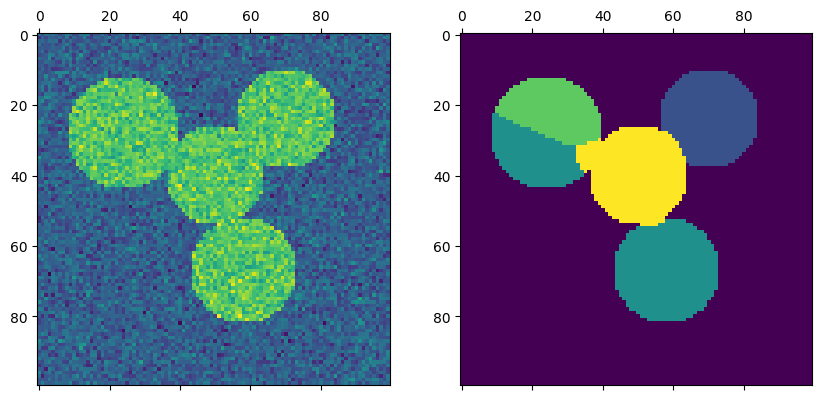

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import SpectralEmbedding
import numpy as np
import matplotlib.pyplot as plt

embedding = SpectralEmbedding(n_components=4, affinity='precomputed')
graph_embedded = embedding.fit_transform(graph.toarray())

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(graph_embedded)
labels = kmeans.labels_

label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

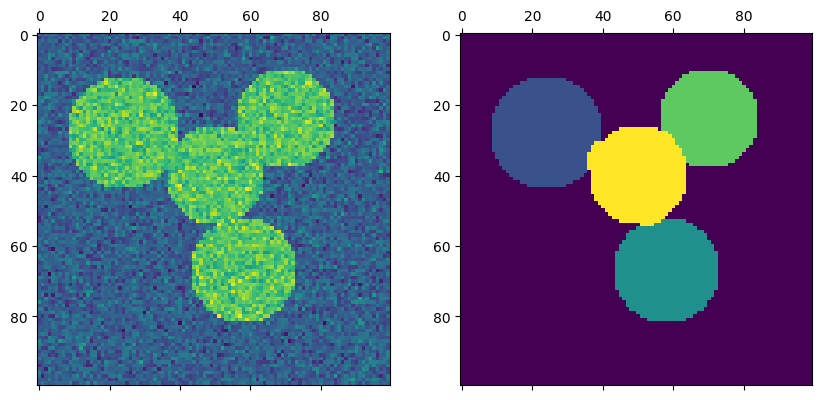

In [ ]:
from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

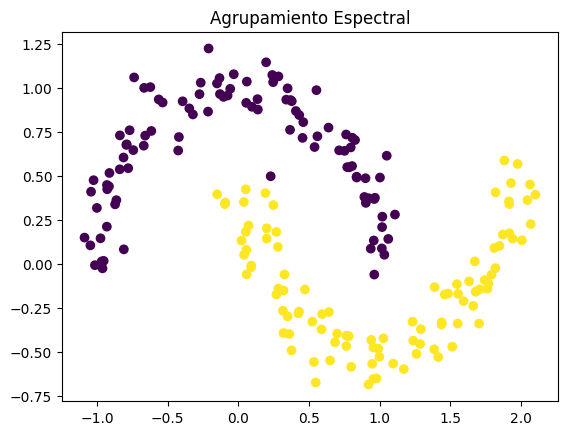

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

X, y = make_moons(n_samples=200, noise=0.1)

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels = spectral.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Agrupamiento Espectral')
plt.show()